In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [37]:
# set noise level
noise_sigma = 0.4

In [41]:
# define 4 stim intervals
stim_num = 4
stim_dur = 25
stim_start = 50
sl = []
for j in range(stim_num):
    sl.append( slice(stim_start+90*j, stim_start+90*j+stim_dur) ) 

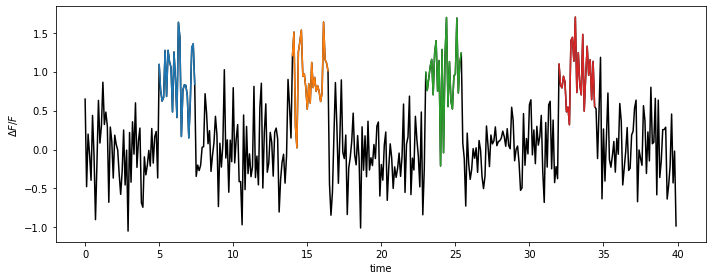

In [42]:
t = np.arange(0,40,.1)
b = np.zeros(len(t)) 

# define binary timeseries equal to 1 during stim (for demo, also used to create dFF)
for j in range(stim_num):
    b[sl[j]] = 1

x = b + np.random.normal(0,noise_sigma,len(t))
xn = x-x.min()
xn /= xn.max()

# plot "stim" and "baseline" periods
plt.figure(figsize=(10,4))
plt.plot(t,x,'k')
for j in range(stim_num):
    plt.plot(t[sl[j]],x[sl[j]] )
plt.xlabel('time')
plt.ylabel(r'$\Delta F/F$')
plt.tight_layout()
plt.show()

### calculate total auROC (for all stim periods)

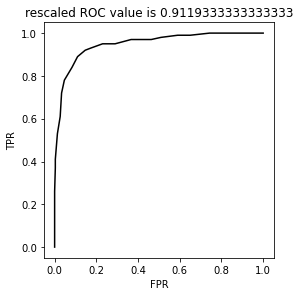

In [46]:
is_p0 = (b==0)  # boolean for stim periods (this could also be done from slice object)
p0 = xn[is_p0]  # p0 is baseline timepoints
p1 = xn[np.logical_not(is_p0)] # p1 is stim timepoints
s = np.linspace(x.min()-1e-6,x.max()+1e-6,100)[::-1] # define bins from smallest to largest dFF value

# for each bin true & false positive rate is fraction of p1 & p0 dist that is greater than bin value
tpr = np.zeros(len(s)) # true positive rate
fpr = np.zeros(len(s)) # false positive rate
for j in range(len(s)):
    tpr[j] = (p1>s[j]).sum()/len(p1)
    fpr[j] = (p0>s[j]).sum()/len(p0)

# auROC is sum of all bins, where height is true positive and width is diff(false positive)
dfpr = np.diff(fpr)
auROC = (dfpr*tpr[1:]).sum()

# plot
plt.figure(figsize=(4,4))
plt.plot(fpr,tpr,'k')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.tight_layout()

# rather than showing auROC, people often rescale so range is (-1,1):
plt.title('rescaled ROC value is '+ str(-1+2*auROC))
plt.show()